<a href="https://colab.research.google.com/github/JoaoVerao/Metricas/blob/main/Metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
import numpy as np

9
3


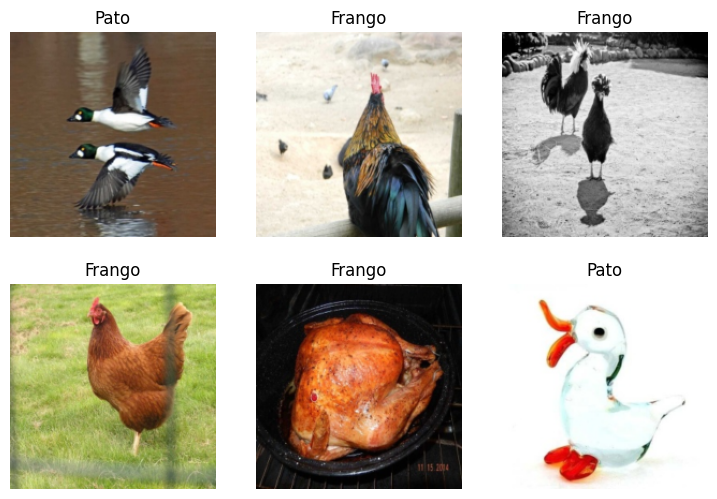

In [2]:
path = Path('/content/dataset')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #informa o tipo de entrada e o tipo de saída
    get_items=get_image_files, #informa que tipo de arquivo a funçao deve coletar
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #separa uma porecentagem aleatoria de seu dataset para validaçao, o restante será utilizado para treino
    get_y=parent_label, #como ele deve rotular cada imagem, neste caso no nome da pasta pai
    item_tfms=[Resize(192, method='squish')] #redimensiona as imagens para agilizar o treino do modelo
).dataloaders(path) # Ajuste o batch_size conforme necessário

print(len(dls.train))
print(len(dls.valid))


dls.show_batch(max_n=6)

In [3]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 75.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.760502,0.087647,0.066225,01:45


epoch,train_loss,valid_loss,error_rate,time
0,0.153109,0.157190,0.059603,02:27
1,0.104024,0.065646,0.026490,02:24
2,0.092748,0.056548,0.026490,02:23


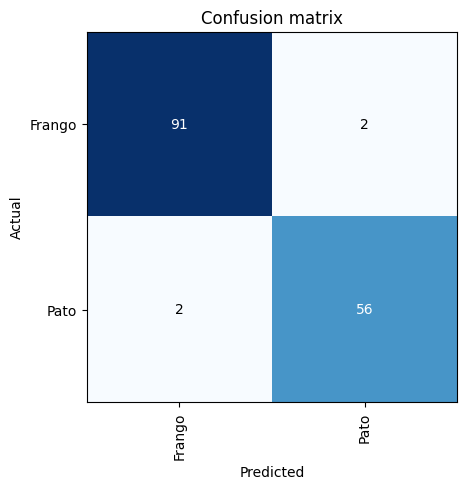

In [4]:
#Cria uma matriz de confusão
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [5]:
matrix = interp.confusion_matrix()
matrix

array([[91,  2],
       [ 2, 56]])

In [6]:
VP = matrix[0][0]
VN = matrix[1][1]
FP = matrix[0][1]
FN = matrix[1][0]
N = VP + VN + FP + FN

In [7]:
sensibilidade = VP / (VP + FN)
sensibilidade

0.978494623655914

In [8]:
especificidade = VN / (VN + FP)
especificidade

0.9655172413793104

In [9]:
acuracia = (VP + VN) / N
acuracia

0.9735099337748344

In [10]:
precisao = VP / (VP + FP)
precisao

0.978494623655914

In [11]:
fscore = (2 * ((precisao * sensibilidade) / (precisao + sensibilidade)))
fscore

0.978494623655914